# __1. Importing Packages__

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# __2. Dataset Overview__

In [2]:
# Reading the data
raw_data = pd.read_csv('./total_data_na.csv')

In [3]:
# Top 5 rows of the dataset
raw_data.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [4]:
# Rows and Columns
raw_data.shape

(143, 25)

In [5]:
# Information about the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  143 non-null    object 
 1   Mat.x   143 non-null    int64  
 2   Inns.x  143 non-null    int64  
 3   NO      143 non-null    int64  
 4   Runs.x  143 non-null    int64  
 5   HS      143 non-null    int64  
 6   Avg.x   143 non-null    object 
 7   BF      143 non-null    int64  
 8   SR.x    143 non-null    float64
 9   X100    143 non-null    int64  
 10  X50     143 non-null    int64  
 11  X4s     143 non-null    int64  
 12  X6s     143 non-null    int64  
 13  Mat.y   143 non-null    int64  
 14  Inns.y  143 non-null    int64  
 15  Ov      143 non-null    float64
 16  Runs.y  143 non-null    int64  
 17  Wkts    143 non-null    int64  
 18  BBI     143 non-null    int64  
 19  Avg.y   143 non-null    object 
 20  Econ    143 non-null    float64
 21  SR.y    143 non-null    object 
 22  X4

In [6]:
# Statistical descrption
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mat.x,143.0,7.286713,6.077692,0.0,0.0,7.00,13.000,17.00
Inns.x,143.0,6.013986,5.499022,0.0,0.0,5.00,11.000,17.00
NO,143.0,1.251748,1.629259,0.0,0.0,1.00,2.000,9.00
Runs.x,143.0,132.349650,175.482243,0.0,0.0,52.00,202.000,735.00
HS,143.0,33.153846,31.969684,0.0,0.0,27.00,53.500,128.00
BF,143.0,95.027972,120.286919,0.0,0.0,41.00,152.500,516.00
SR.x,143.0,93.120280,67.202818,0.0,0.0,117.02,140.595,300.00
X100,143.0,0.034965,0.219236,0.0,0.0,0.00,0.000,2.00
X50,143.0,0.706294,1.447836,0.0,0.0,0.00,1.000,8.00
X4s,143.0,11.461538,16.706147,0.0,0.0,3.00,17.000,68.00


# __3. Data Preperation__

In [7]:
# Copying the data
data = raw_data.copy(deep=True)

In [8]:
data.columns = data.columns.str.capitalize()

In [9]:
data.columns

Index(['Player', 'Mat.x', 'Inns.x', 'No', 'Runs.x', 'Hs', 'Avg.x', 'Bf',
       'Sr.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y', 'Ov', 'Runs.y',
       'Wkts', 'Bbi', 'Avg.y', 'Econ', 'Sr.y', 'X4w', 'X5w', 'Y'],
      dtype='object')

In [10]:
data.columns = data.columns.str.replace('.', '_')

In [11]:
# Replace the unknown characters to NAN
data = data.replace(to_replace='-', value=np.nan)

In [13]:
# Changing the data type
type_change = ['Avg_x', 'Avg_y', 'Sr_y']
for column in type_change:
    data[column] = data[column].astype('float64')

# __4. Data Preprocessing__

In [15]:
# Filtering number columns
numcols = data.select_dtypes(include=['int64', 'float64']).columns

In [16]:
# Finding missing values
data.isnull().sum()

Player     0
Mat_x      0
Inns_x     0
No         0
Runs_x     0
Hs         0
Avg_x      3
Bf         0
Sr_x       0
X100       0
X50        0
X4s        0
X6s        0
Mat_y      0
Inns_y     0
Ov         0
Runs_y     0
Wkts       0
Bbi        0
Avg_y     13
Econ       0
Sr_y      13
X4w        0
X5w        0
Y          0
dtype: int64

In [17]:
# Impute missing values with their mean value 
data['Avg_x'].fillna(data['Avg_x'].mean(),inplace=True)
data['Avg_y'].fillna(data['Avg_y'].mean(),inplace=True)
data['Sr_y'].fillna(data['Sr_y'].mean(),inplace=True)

In [18]:
# No.of unique values present in every data columns
data.nunique()

Player    143
Mat_x      18
Inns_x     18
No          9
Runs_x     90
Hs         62
Avg_x      95
Bf         85
Sr_x       98
X100        3
X50         8
X4s        40
X6s        30
Mat_y      18
Inns_y     18
Ov         68
Runs_y     88
Wkts       22
Bbi         1
Avg_y      81
Econ       83
Sr_y       69
X4w         3
X5w         2
Y           1
dtype: int64

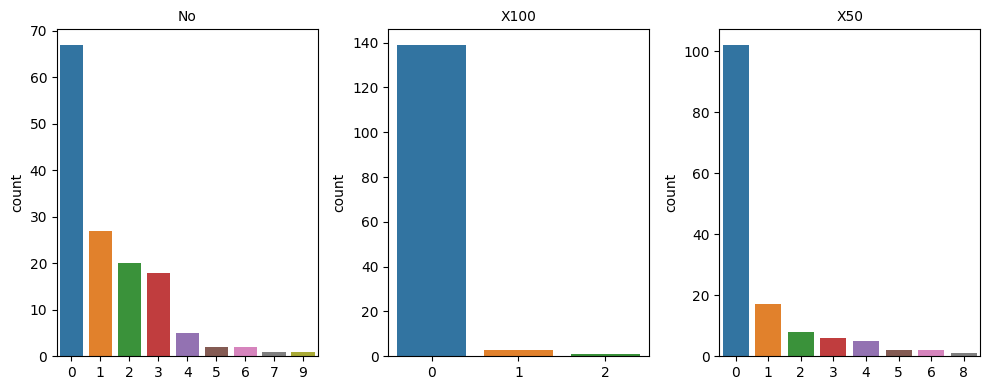

In [19]:
# creates a figure and multiple subplots using the matplotlib library
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10,4))

# flattens the 2D array of subplots into a 1D array
axes = axes.flat

# creates a list of column names that will be used to plot the barplot
count_features = ['No', 'X100', 'X50']

# for loop that will iterate through the list of column names
for index, column in enumerate(count_features):
    sns.countplot(
        data=data,
        x=column,
        ax=axes[index]
    )

# removes the x-axis label of the current subplot
    axes[index].set_xlabel('')
    axes[index].set_title(column, size=10)
plt.tight_layout()
plt.show()

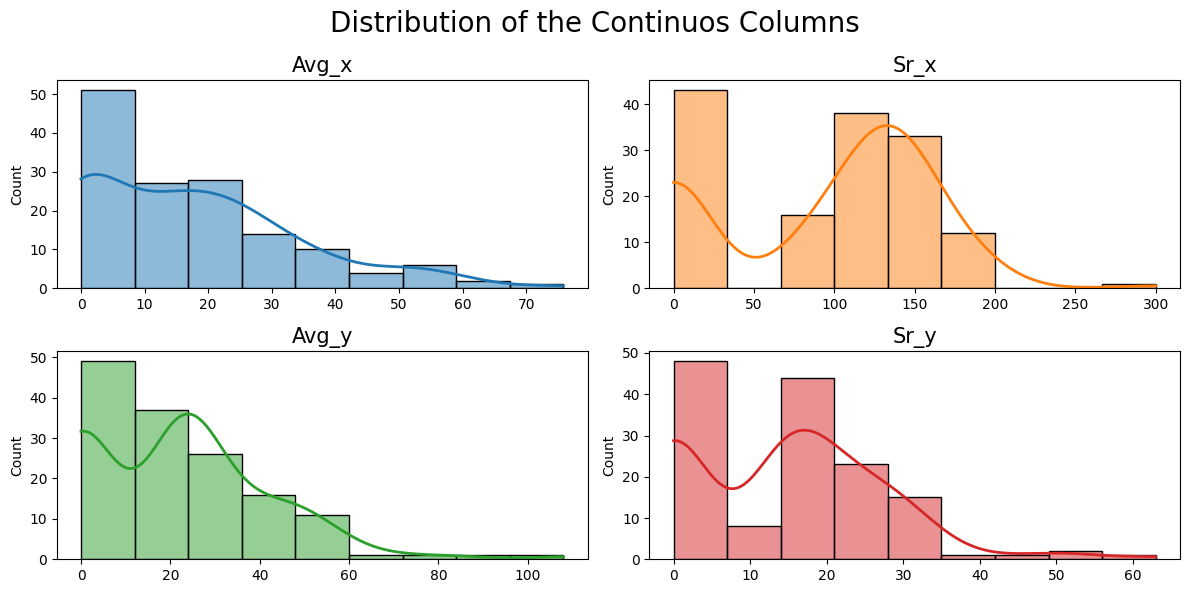

In [66]:
# creates a figure and multiple subplots using the matplotlib library
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,6))

# flattens the 2D array of subplots into a 1D array
axes = axes.flat

# creates a list of column names that will be used to plot the histograms
cols = ['Avg_x', 'Sr_x', 'Avg_y', 'Sr_y']

# for loop that will iterate through the list of column names
for index, column in enumerate(cols):
    sns.histplot(
        data=data,
        x=column,
        stat='count',
        color=(list(plt.rcParams['axes.prop_cycle']))[index]['color'],
        kde=True,
        line_kws={'linewidth':2},
        ax=axes[index]
    )
# removes the x-axis label of the current subplot
    axes[index].set_xlabel('')

# sets the title of the current subplot to the current column name
    axes[index].set_title(column, size=15)

# adds a main title to the figure
plt.suptitle('Distribution of the Continuos Columns', size=20)

# adjusts the spacing between subplots to optimize the layout
plt.tight_layout()

# displays the figure on the screen
plt.show()

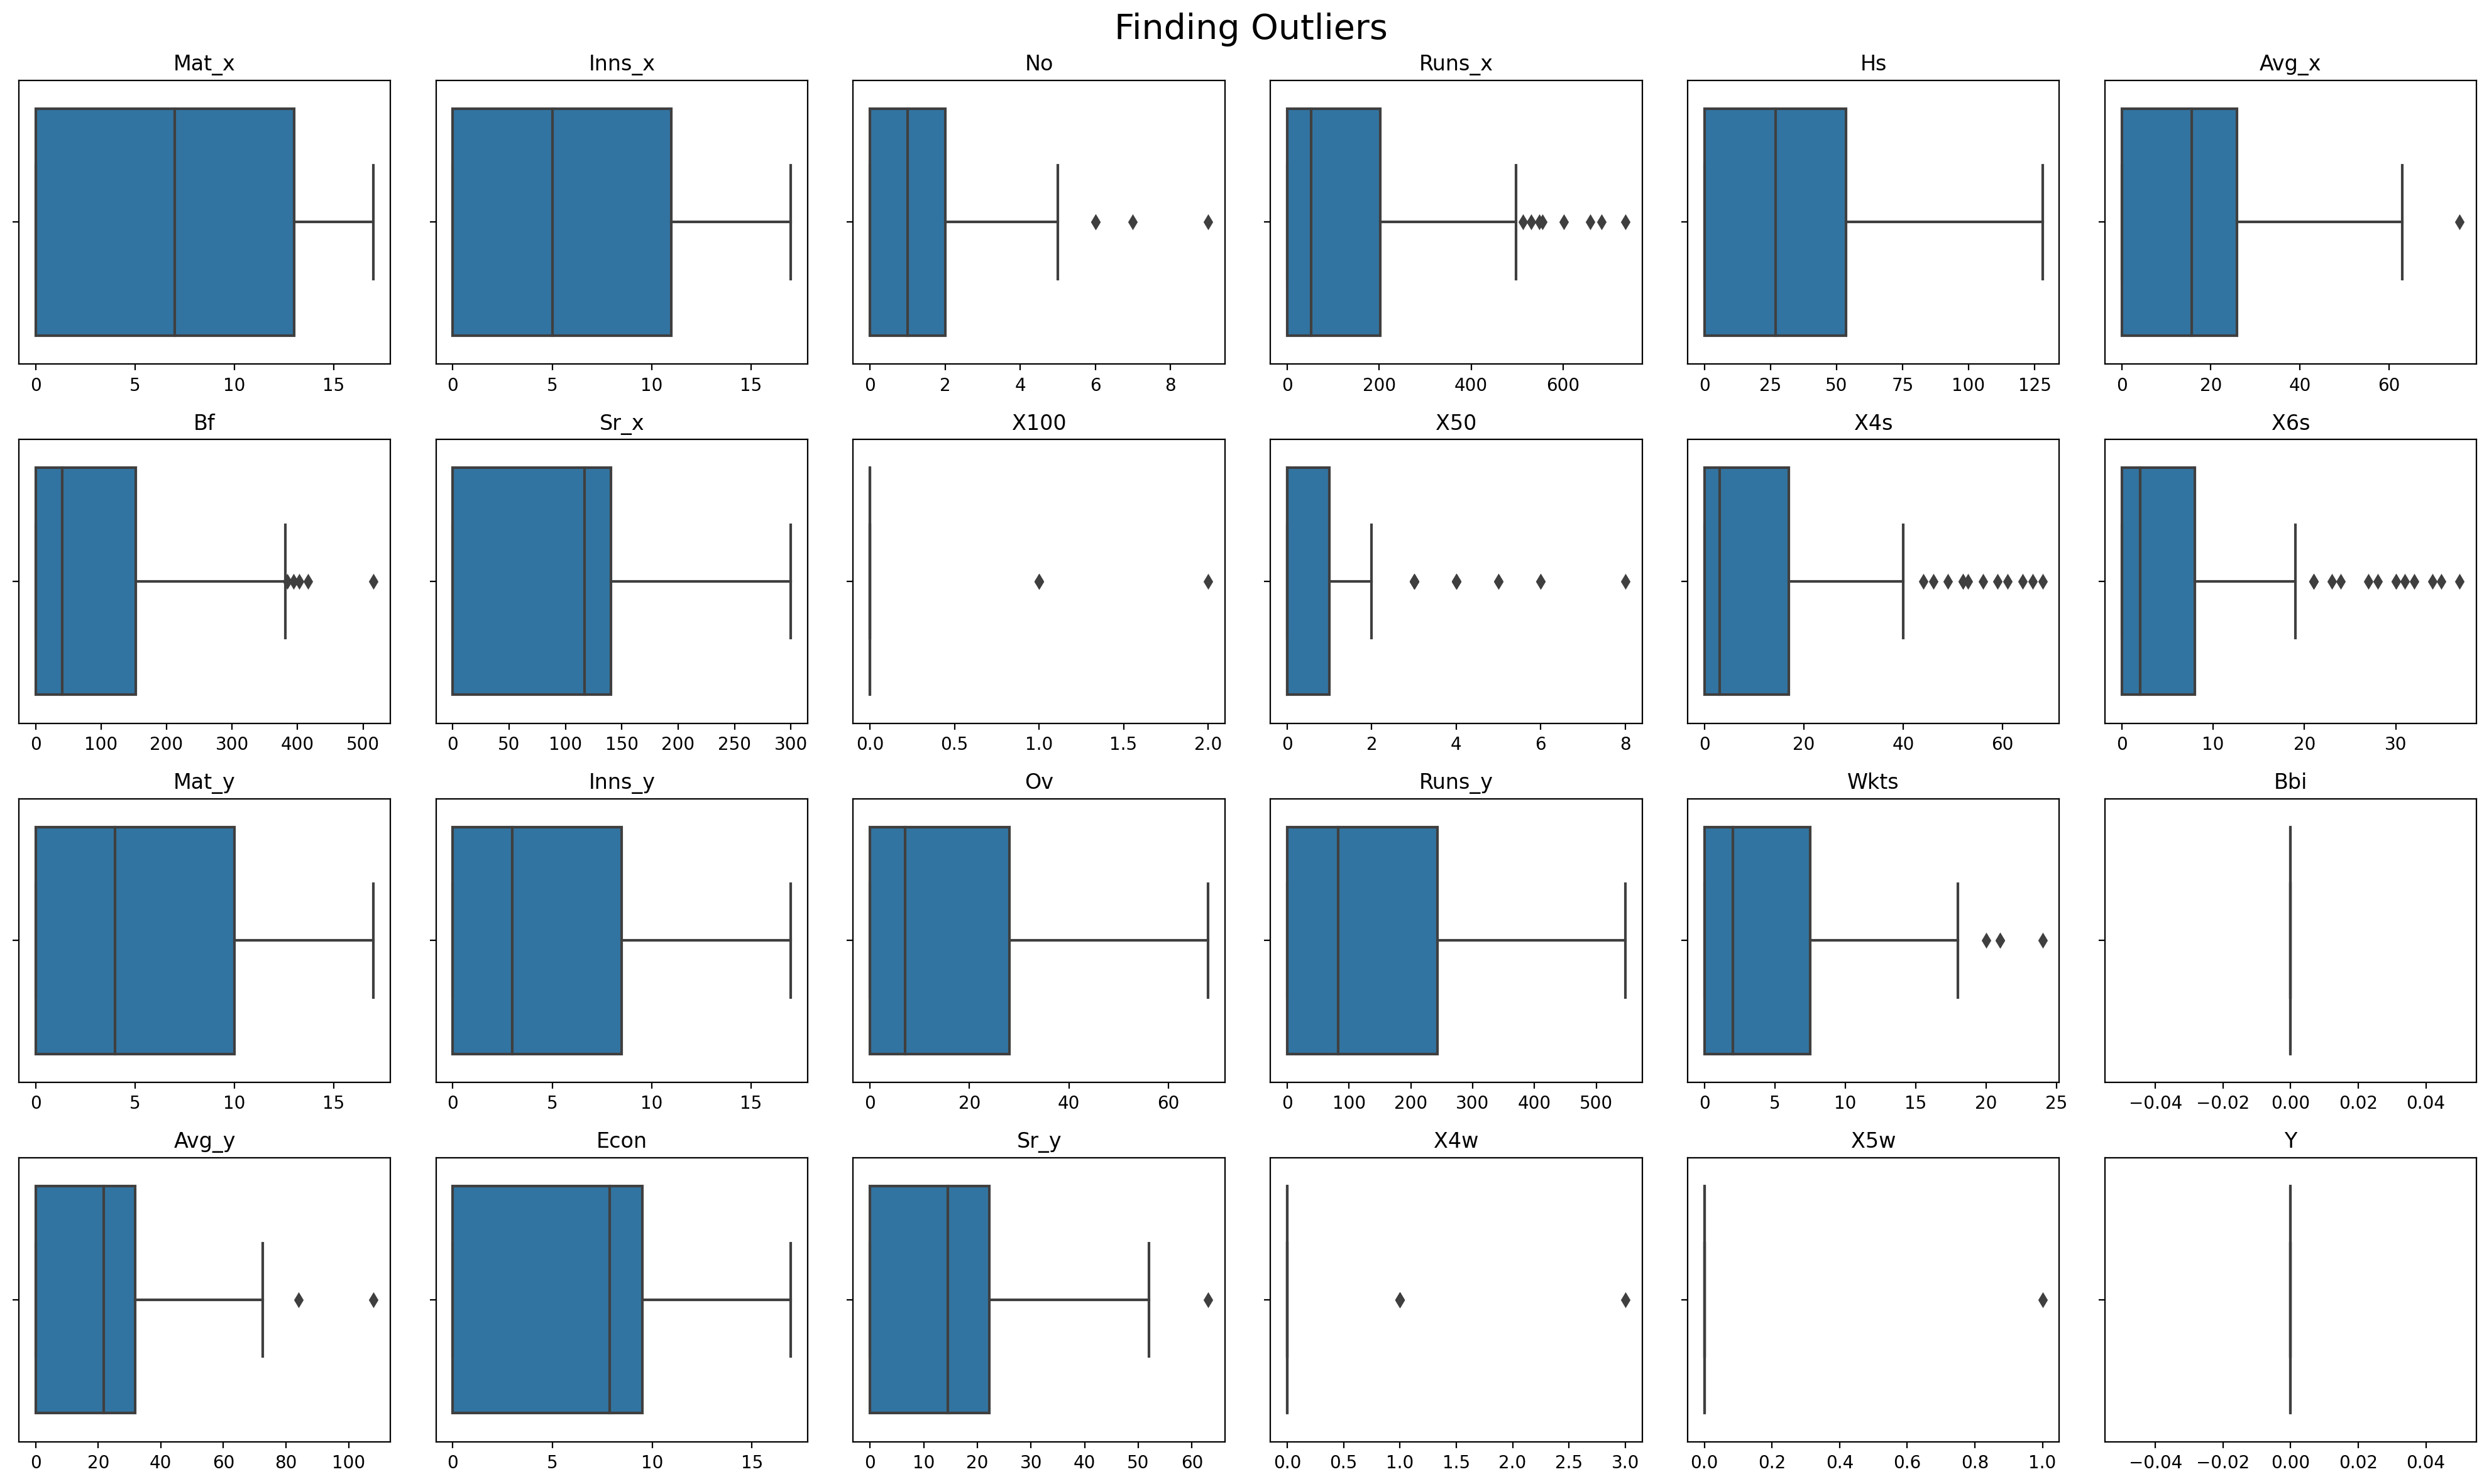

In [35]:
# creates a figure and multiple subplots using the matplotlib library
fig, axes = plt.subplots(ncols=6, nrows=4, figsize=(20,12), dpi=200)

# flattens the 2D array of subplots into a 1D array
axes = axes.flat

# for loop that will iterate through the list of column names
for index, column in enumerate(numcols):
    sns.boxplot(
        data=data,
        x=column,
        ax=axes[index]
    )

# removes the x-axis label of the current subplot
    axes[index].set_xlabel('')
    axes[index].set_title(column)
plt.suptitle('Finding Outliers', fontsize=30)
plt.tight_layout()
plt.show()

Skewness of Mat_x: 0.076606625401767
Skewness of Inns_x: 0.43225069456340515
Skewness of No: 1.735707473336934
Skewness of Runs_x: 1.5441278028646528
Skewness of Hs: 0.747004128760288
Skewness of Avg_x: 0.938433051888929
Skewness of Bf: 1.4241351355306788
Skewness of Sr_x: -0.2604737301320953
Skewness of X100: 6.966222497881206
Skewness of X50: 2.531879857792785
Skewness of X4s: 1.7853667494250738
Skewness of X6s: 1.8156438196802784
Skewness of Mat_y: 0.5717524212139679
Skewness of Inns_y: 0.772348237185497
Skewness of Ov: 0.9882623666038439
Skewness of Runs_y: 0.8946083682754622
Skewness of Wkts: 1.2530891072212975
Skewness of Bbi: 0
Skewness of Avg_y: 0.9574235820846797
Skewness of Econ: -0.2791202515505818
Skewness of Sr_y: 0.696710965691167
Skewness of X4w: 7.194442809363777
Skewness of X5w: 11.958260743101413
Skewness of Y: 0


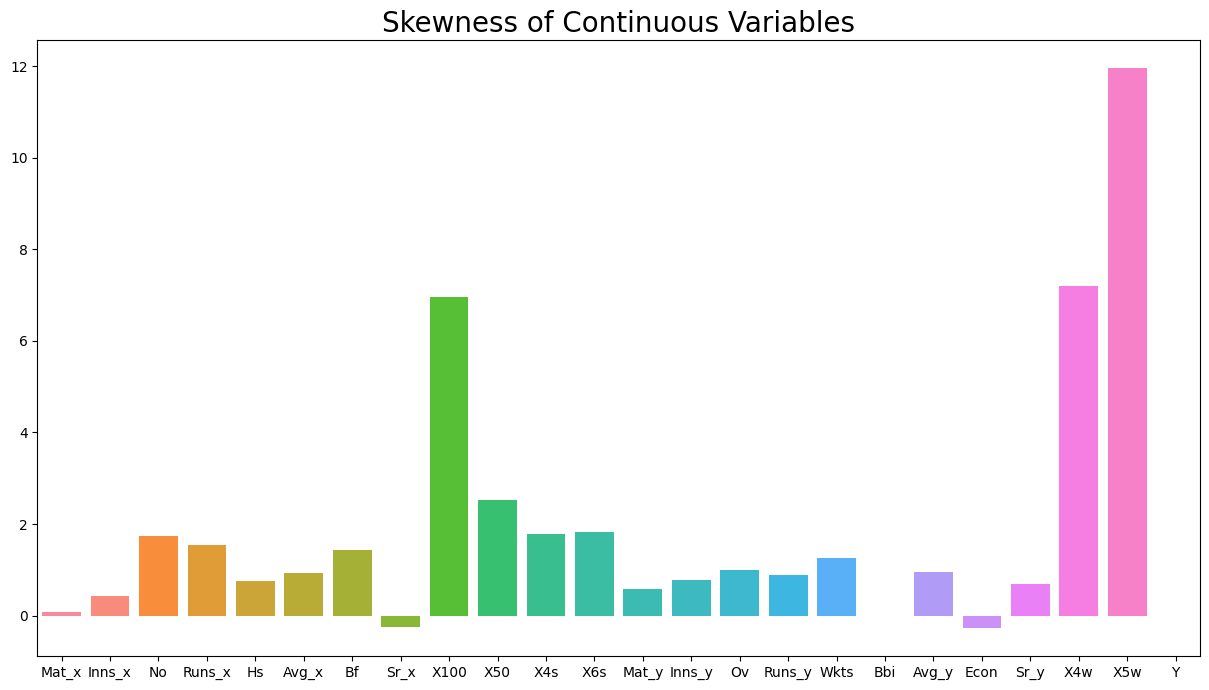

In [36]:
# Finding Skewness
skew = {}

# for loop that will iterate through the list of column names
for col in data[numcols]:
    skewness = data[col].skew()
    skew[col]=skewness
    print(f"Skewness of {col}: {skewness}")

plt.figure(figsize=(15,8))
sns.barplot(x=list(skew.keys()), y=list(skew.values()), saturation=2)
plt.title("Skewness of Continuous Variables", fontsize=20)
plt.show()

In [37]:
# finding relation between the data
data.corr().style.background_gradient('plasma')

,Mat_x,Inns_x,No,Runs_x,Hs,Avg_x,Bf,Sr_x,X100,X50,X4s,X6s,Mat_y,Inns_y,Ov,Runs_y,Wkts,Bbi,Avg_y,Econ,Sr_y,X4w,X5w,Y
Mat_x,1.000000,0.916473,0.621347,0.723136,0.744583,0.646519,0.739628,0.777217,0.182690,0.523431,0.673888,0.661068,0.116253,0.053495,0.023220,0.004212,-0.003295,nan,-0.290657,-0.444839,-0.260778,0.032654,-0.100965,nan
Inns_x,0.916473,1.000000,0.562398,0.872369,0.854022,0.718739,0.888250,0.713870,0.239087,0.657717,0.823222,0.795834,-0.090843,-0.165696,-0.196373,-0.219665,-0.193785,nan,-0.423764,-0.567797,-0.411835,-0.058499,-0.092099,nan
No,0.621347,0.562398,1.000000,0.396723,0.409319,0.620501,0.397643,0.495803,0.014614,0.279354,0.305141,0.369858,0.160959,0.078428,0.040074,0.050595,0.025118,nan,-0.031006,-0.148006,-0.036715,0.013796,-0.064700,nan
Runs_x,0.723136,0.872369,0.396723,1.000000,0.884152,0.777884,0.990385,0.555502,0.384814,0.893337,0.972272,0.921176,-0.277629,-0.317310,-0.322647,-0.342976,-0.304923,nan,-0.473986,-0.606136,-0.482588,-0.115846,-0.063514,nan
Hs,0.744583,0.854022,0.409319,0.884152,1.000000,0.828241,0.874033,0.739197,0.402134,0.762310,0.830474,0.866607,-0.280735,-0.327453,-0.344854,-0.361960,-0.337882,nan,-0.496377,-0.659862,-0.501900,-0.137067,-0.087332,nan
Avg_x,0.646519,0.718739,0.620501,0.777884,0.828241,1.000000,0.764274,0.753443,0.246244,0.675753,0.711645,0.747903,-0.273930,-0.336065,-0.351218,-0.356264,-0.344406,nan,-0.385467,-0.549963,-0.408458,-0.130488,-0.087308,nan
Bf,0.739628,0.888250,0.397643,0.990385,0.874033,0.764274,1.000000,0.546344,0.344715,0.873881,0.966648,0.876896,-0.295080,-0.343517,-0.348025,-0.369168,-0.328013,nan,-0.497349,-0.627006,-0.506016,-0.109389,-0.066529,nan
Sr_x,0.777217,0.713870,0.495803,0.555502,0.739197,0.753443,0.546344,1.000000,0.149589,0.383659,0.503606,0.561732,-0.061619,-0.111514,-0.144184,-0.152878,-0.164780,nan,-0.269014,-0.472677,-0.260075,-0.099631,-0.116691,nan
X100,0.182690,0.239087,0.014614,0.384814,0.402134,0.246244,0.344715,0.149589,1.000000,0.254441,0.349349,0.502798,0.011148,-0.018097,-0.041368,-0.038496,-0.060587,nan,-0.039982,-0.088353,-0.040786,-0.029084,-0.013431,nan
X50,0.523431,0.657717,0.279354,0.893337,0.762310,0.675753,0.873881,0.383659,0.254441,1.000000,0.881713,0.805290,-0.367646,-0.355474,-0.332206,-0.346807,-0.303347,nan,-0.450694,-0.555473,-0.471906,-0.088962,-0.041081,nan


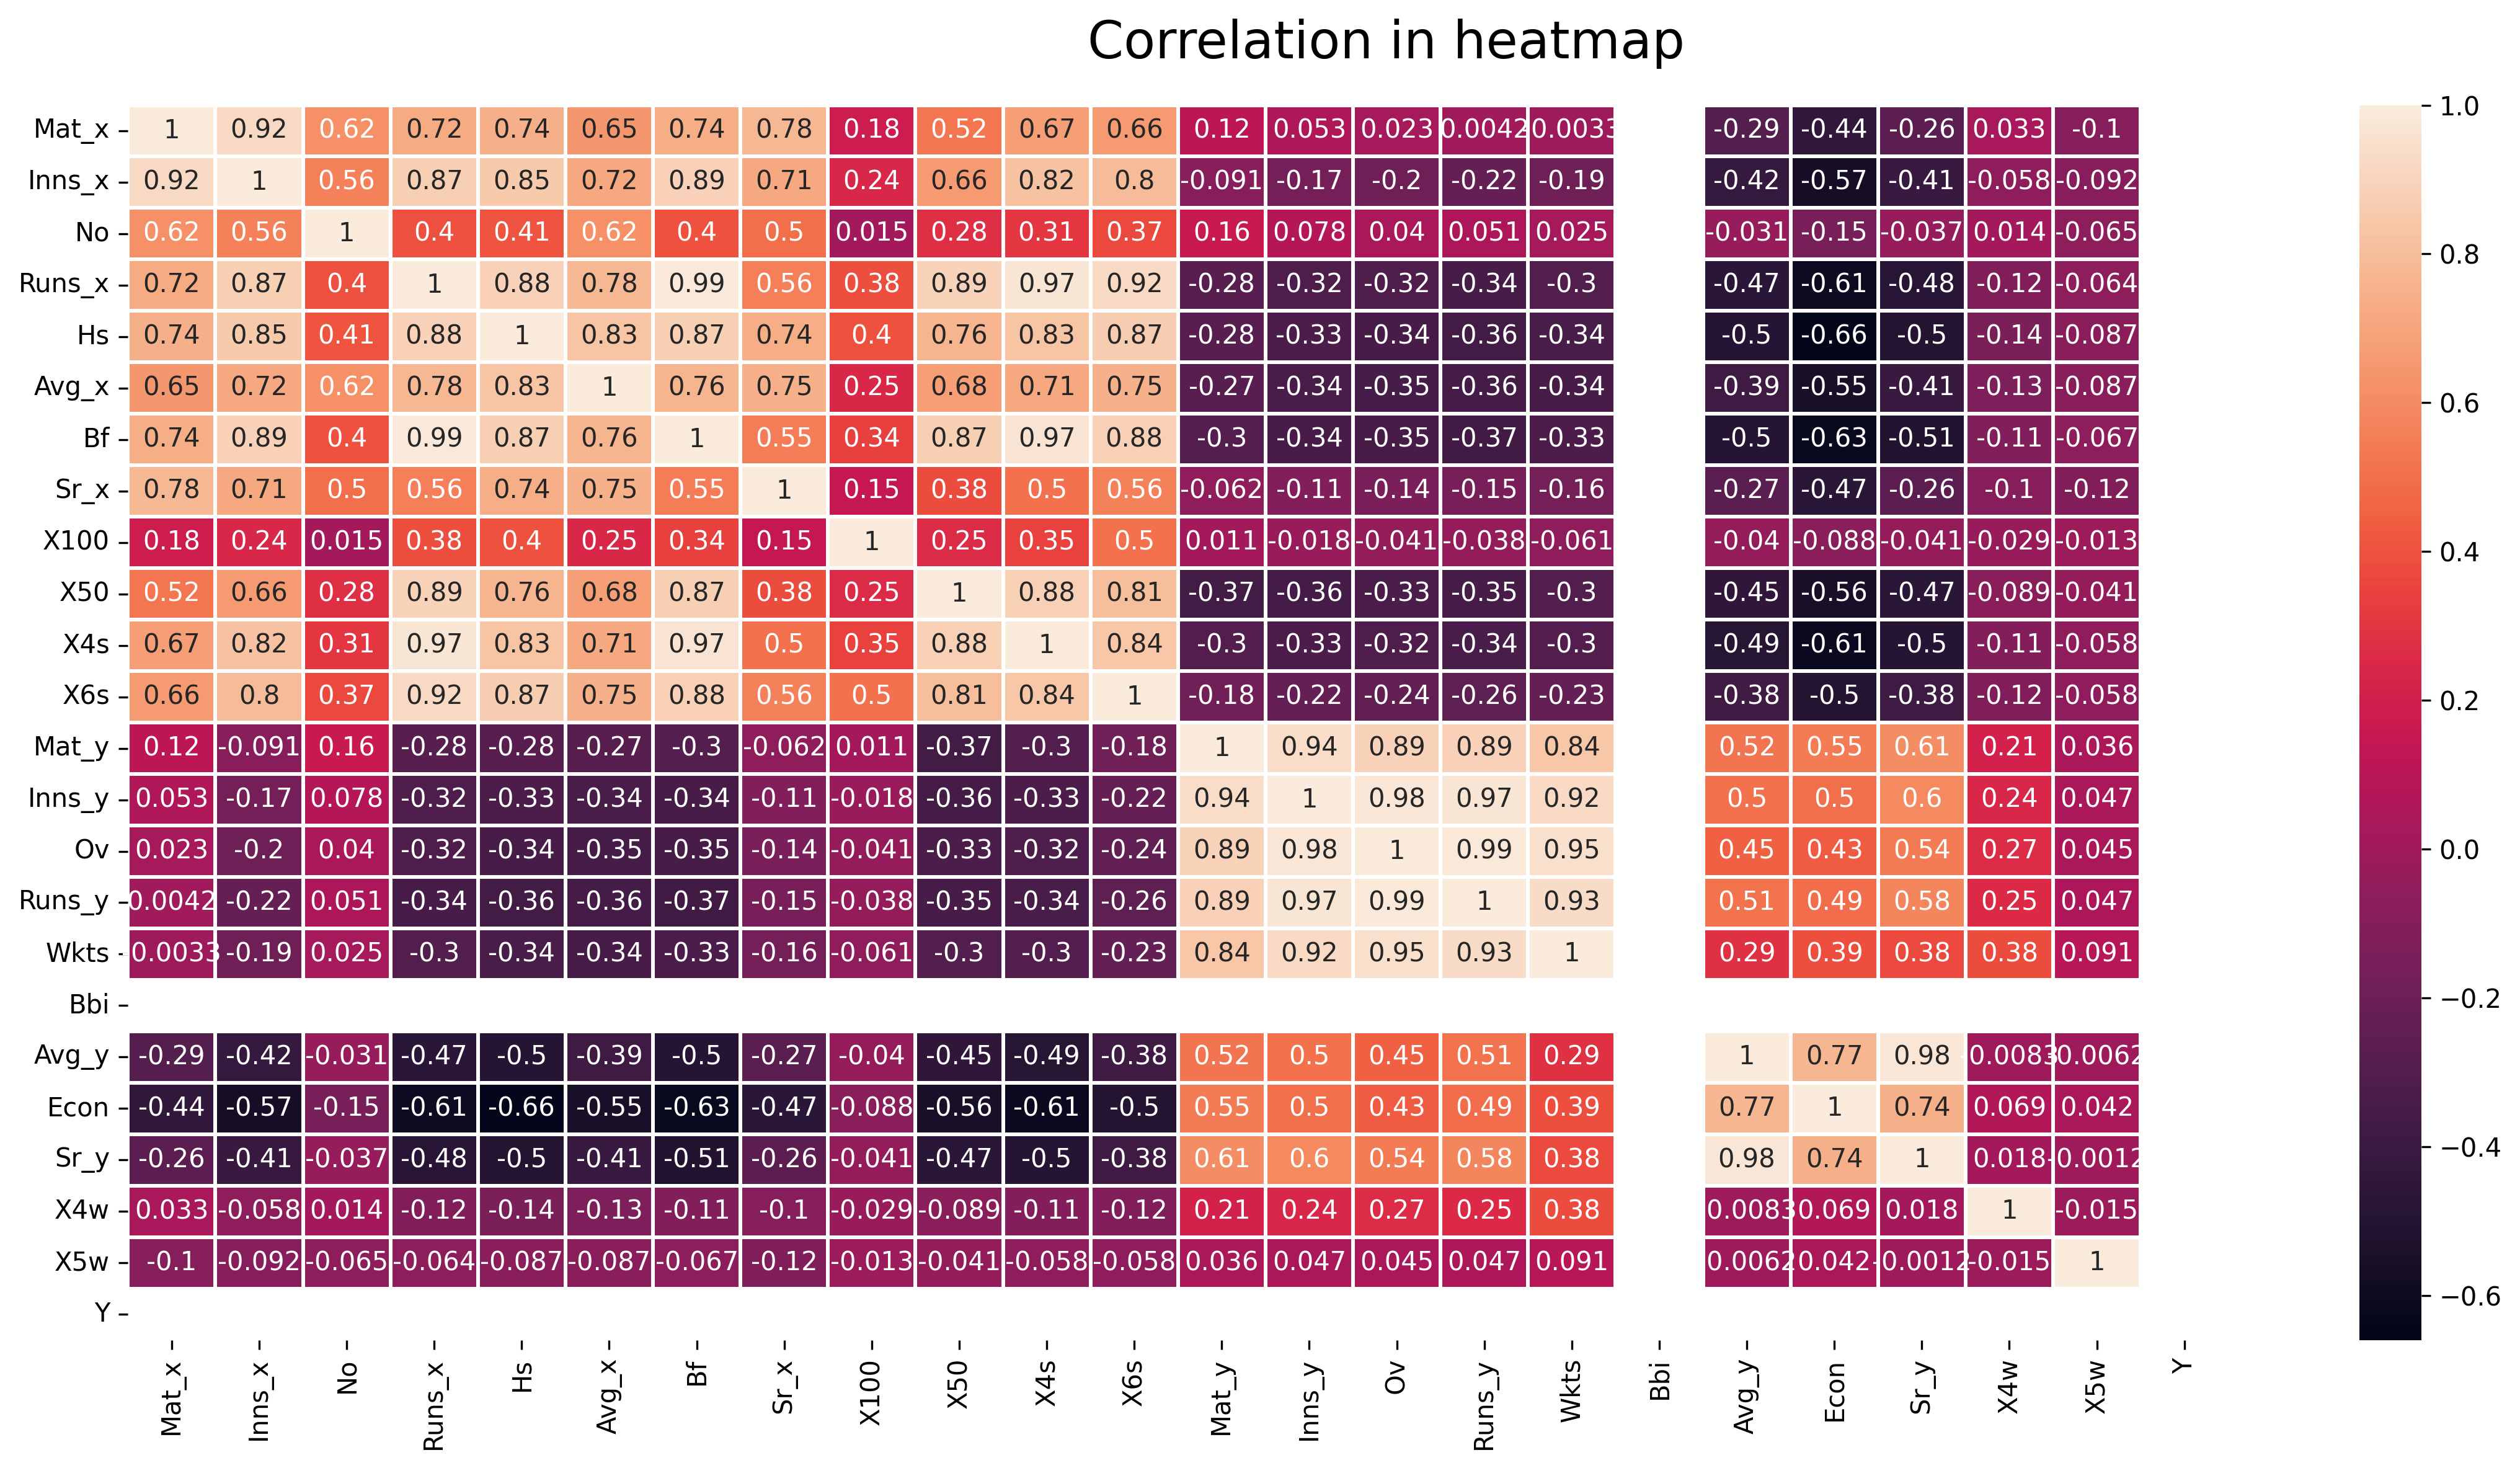

In [40]:
# Using heatmap to find correlation
plt.figure(figsize=(15,8), dpi=300)

# plotting heatmap
sns.heatmap(
    data.corr(), 
    annot=True, 
    linewidth=True
)
plt.suptitle('Correlation in heatmap', size=20)
plt.tight_layout()

In [41]:
# dropping unwaanted columns
data.drop(columns=['Y', 'Player', 'Bbi'], inplace=True)

In [42]:
# Selecting the numerical columns
X = data.iloc[:, 1:]

In [43]:
# import standard scaler for scaling the data
from sklearn.preprocessing import StandardScaler

# creating an object for the class
scaler = StandardScaler()

# scaling the data 
data_scaled = scaler.fit_transform(X)

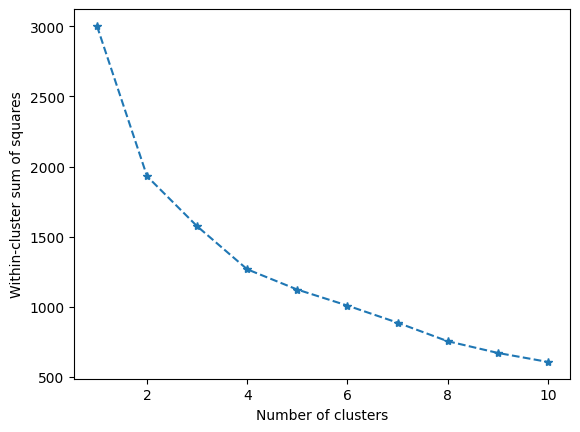

In [44]:
# importing kmeans algorithm
from sklearn.cluster import KMeans

# Create an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Define a range of possible number of clusters
k_range = range(1, 11)

# Loop through the range of possible number of clusters
for k in k_range:
    # Create a KMeans object with the current number of clusters
    kmeans = KMeans(n_clusters=k)
    # Fit the model to the scaled data
    kmeans.fit(data_scaled)
    # Append the WCSS for the current number of clusters to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS versus the number of clusters
plt.plot(k_range, wcss, '*--')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()


# Find the "elbow point" on the plot
# This is the point at which the WCSS starts to decrease at a slower rate
# The number of clusters at this point is considered to be the optimal number of clusters
# In this case, it looks like the optimal number of clusters is around 2

In [59]:
# Create a KMeans object with the optimal number of clusters
kmeans = KMeans(n_clusters=2)
# Fit the model to the scaled data
kmeans.fit(data_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add the labels to the original dataframe
data['cluster'] = labels

# Print the first 5 rows of the original dataframe with the added cluster labels
data.head()

,Mat_x,Inns_x,No,Runs_x,Hs,Avg_x,Bf,Sr_x,X100,X50,...,Inns_y,Ov,Runs_y,Wkts,Avg_y,Econ,Sr_y,X4w,X5w,cluster
0,10,9,1,134,46,16.75,100,134.00,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0,0,1
1,12,11,2,480,90,53.33,275,174.54,0,6,...,0,0.0,0,0,0.0,0.0,0.0,0,0,1
2,3,3,2,63,46,63.00,33,190.90,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0,0,1
3,15,14,1,370,65,28.46,313,118.21,0,1,...,0,0.0,0,0,0.0,0.0,0.0,0,0,1
4,6,6,0,148,45,24.66,118,125.42,0,0,...,0,0.0,0,0,0.0,0.0,0.0,0,0,1


In [60]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the cluster centers
print(cluster_centers)

[[-0.45084228 -0.11489055 -0.49610007 -0.53060464 -0.44632756 -0.51348938
  -0.35588613 -0.1600461  -0.43680507 -0.49129691 -0.41978482  0.46598835
   0.48262133  0.45341823  0.47487423  0.41546933  0.5632986   0.67825522
   0.58682932  0.10073849  0.04651984]
 [ 0.81328411  0.20725353  0.89492561  0.95716915  0.80513992  0.92629457
   0.64199066  0.28871061  0.78796208  0.88626109  0.75725889 -0.84060644
  -0.87061103 -0.81793092 -0.85663587 -0.74947408 -1.0161465  -1.22351922
  -1.05859407 -0.18172434 -0.08391814]]


In [61]:
# Evaluate the model
from sklearn import metrics

# Calculate the silhouette score
silhouette_score = metrics.silhouette_score(data_scaled, labels, metric='euclidean')
print("Silhouette Score: ", silhouette_score)

Silhouette Score:  0.36293223661319646


# __Building the model__

In [62]:
# Splitting the dataset into target and features
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [72]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.20,stratify=y)

In [73]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (114, 21)
xtest shape:  (29, 21)
ytrain shape:  (114,)
ytest shape:  (29,)


In [74]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f'Accuracy:{ac}\n {cm} \n{cr}')

Accuracy:1.0
 [[19  0]
 [ 0 10]] 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        10

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

